# Unsupervised Learning - Project 2 - PCA and SVM

## About the Project:

The purpose of the case study is to classify a given silhouette as one of three different types of
vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from
one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double-decker bus, Chevrolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was
chosen with the expectation that the bus, van and either one of the cars would be readily
distinguishable, but it would be more difficult to distinguish between the cars.

## 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("vehicle.csv")

In [6]:
df.sample(5)

compactness  circularity  distance_circularity  radius_ratio  \
303           89         36.0                  68.0         149.0   
260           83         37.0                  54.0         118.0   
46            91         43.0                  70.0         133.0   
567           91         40.0                  83.0         166.0   
436           93         42.0                  64.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
303                  60.0                        8          133.0   
260                  55.0                        4          129.0   
46                   55.0                        8          130.0   
567                  60.0                        8          160.0   
436                  51.0                        7          135.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
303           50.0                    18.0                        134   
260           52.0                    18.0                        127   
46            51.0                    18.0                        146   
567           41.0                    20.0                        133   
436           51.0                    18.0                        144   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
303            153.0              265.0                      119.0   
260            146.0              245.0                      140.0   
46             159.0              253.0                      156.0   
567            189.0              383.0                      155.0   
436            164.0              262.0                      155.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
303                         62.0             6.0              18.0   
260                         81.0             4.0              13.0   
46                          70.0             1.0               8.0   
567                         72.0             5.0               7.0   
436                         78.0            16.0              12.0   

     skewness_about.2  hollows_ratio class  
303             201.0            209   van  
260             180.0            184   car  
46              190.0            194   van  
567             186.0            191   car  
436             185.0            185   van

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

From the info of the df we could see that there are some missing values in the data. Collecting the sum of missing values

In [8]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
df["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

_Replacing the class column values with numbers. Car - 0, Bus - 1, Van - 2_

In [10]:
df["class"].replace({ 'car': 0, 'bus': 1, 'van': 2 }, inplace=True)

### Dataset has 18 independent variables, 1 dependent variable (class) and 846 observations. The class has 3 unique values car, bus and van

### Moreover, dataset has missing values.

### Let us analyze the distribution of data and outliers

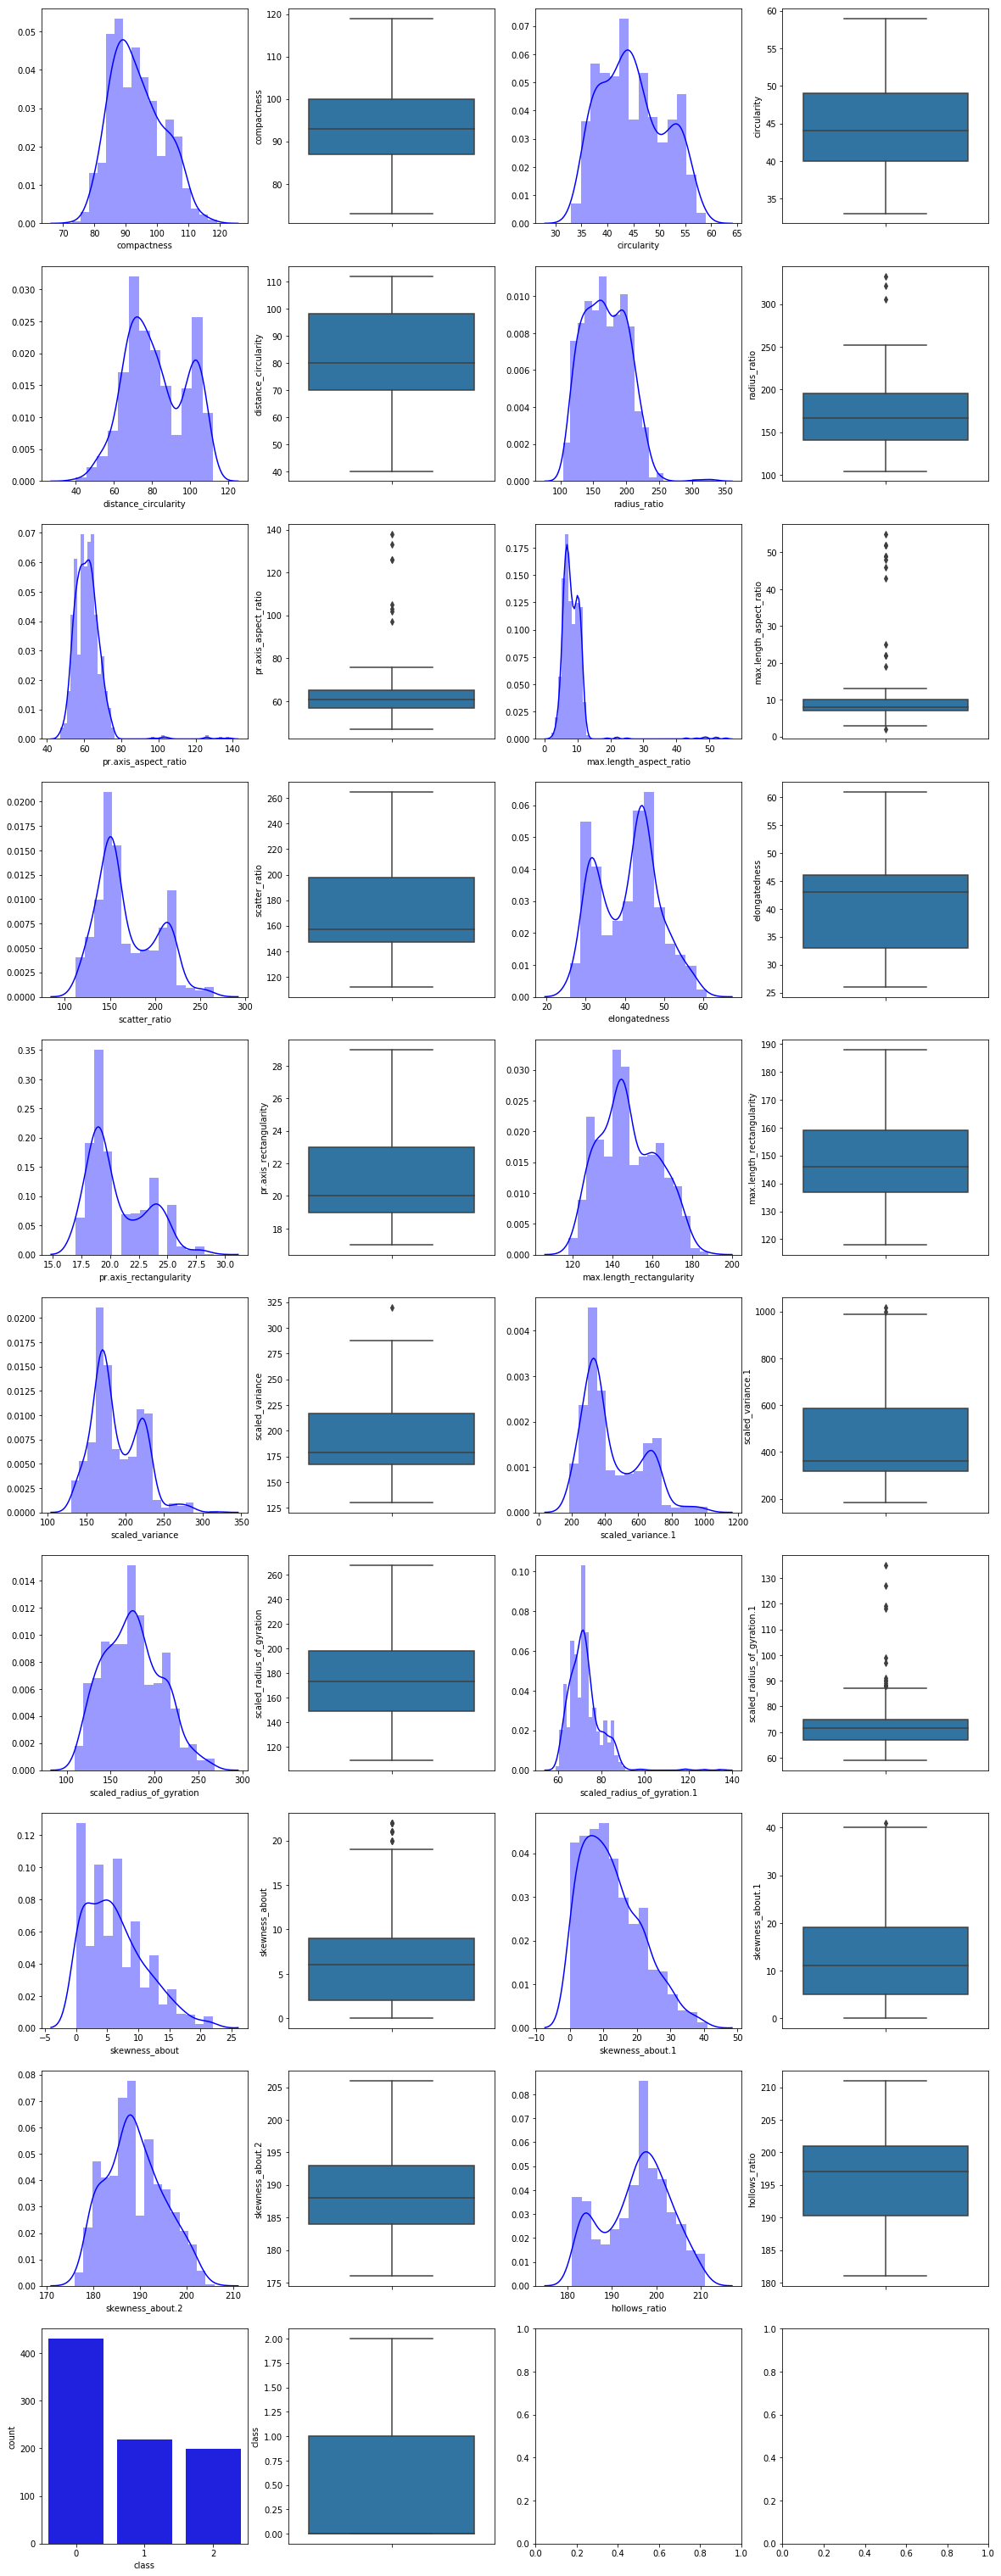

In [11]:
fig, axes = plt.subplots(10,4, figsize = (20,55))
row = 0
col = 0

for c in df.columns:
    if c=='class':
        sns.countplot(df[c], ax=axes[row, col], color='b')
    else:
        sns.distplot(df[c].fillna(df[c].median()), ax=axes[row, col], color='b')
    
    sns.boxplot(y=df[c], ax=axes[row, col+1])
    if col == 2:
        row += 1
        col = 0
    else:
        col += 2

**Inferences on the distribution and outliers from the plots above**

1. compactness: normal distribution and no outlier
2. circularity: normal distribution and no outlier
3. distance_circularity: normal distribution and no outlier
4. radius_ratio: right skewed distribution and positive outliers
5. pr.axis_aspect_ratio: right skewed distribution and positive outliers
6. max.length_aspect_ratio: right skewed distribution and positive outliers
7. scatter_ratio: normal distribution and no outlier
8. elongatedness: normal distribution and no outlier
9. pr.axis_rectangularity: normal distribution and no outlier
10. max.length_rectangularity: normal distribution and no outlier
11. scaled_variance: right skewed distribution and one positive outlier
12. scaled_variance.1: right skewed distribution and positive outliers
13. scaled_radius_of_gyration: normal distribution and no outlier
14. scaled_radius_of_gyration.1: right skewed distribution and positive outliers
15. skewness_about: right skewed distribution and positive outliers
16. skewness_about.1: right skewed distribution and one positive outlier
17. skewness_about.2: normal distribution and no outlier
18. hollows_ratio: normal distribution and no outlier
19. class: shows a normal distribution and no outlier. class 0 (car) has 50% of the overall data

### To avoid `Data Leaks` when treating the missing values and outliers, let us split the data into train and test and then perform the missing value and outlier treatments independently

In [12]:
# Split the data columns into independent and dependent variables

X = df.drop("class", axis=1)
y = df[["class"]]

In [13]:
X.shape, y.shape

((846, 18), (846, 1))

In [14]:
# Split the data rows into train and test with test size as 30% of the overall data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### a. Treat missing values

In [15]:
X_train = X_train.fillna(X_train.mean(), axis=0) # Fill missing values independently for train and test data
X_test = X_test.fillna(X_test.mean(), axis=0)

### b. Treat outliers (Find and Remove Outliers)

In [16]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

# Interquartile range for all columns
print(IQR)

compactness                     12.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    55.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          4.00
scatter_ratio                   53.25
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       23.00
scaled_variance                 50.00
scaled_variance.1              278.25
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 8.00
hollows_ratio                   11.00
dtype: float64


In [17]:
X_train.shape

(592, 18)

In [18]:
# Remove the outliers
X_train = X_train[~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
X_train.shape

(572, 18)

In [19]:
y_train = y_train.loc[X_train.index] # Remove the outlier rows from y_train as well

### Repeating the above steps for test data

In [20]:
Q1 = X_test.quantile(0.25)
Q3 = X_test.quantile(0.75)
IQR = Q3 - Q1

print('Shape of test data before', X_test.shape)

X_test = X_test[~((X_test < (Q1 - 1.5 * IQR)) | (X_test > (Q3 + 1.5 * IQR))).any(axis=1)]

y_test = y_test.loc[X_test.index] # Remove the outlier rows from y_test as well

print('Shape of test data after', X_test.shape)

Shape of test data before (254, 18)
Shape of test data after (232, 18)


## 2. Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

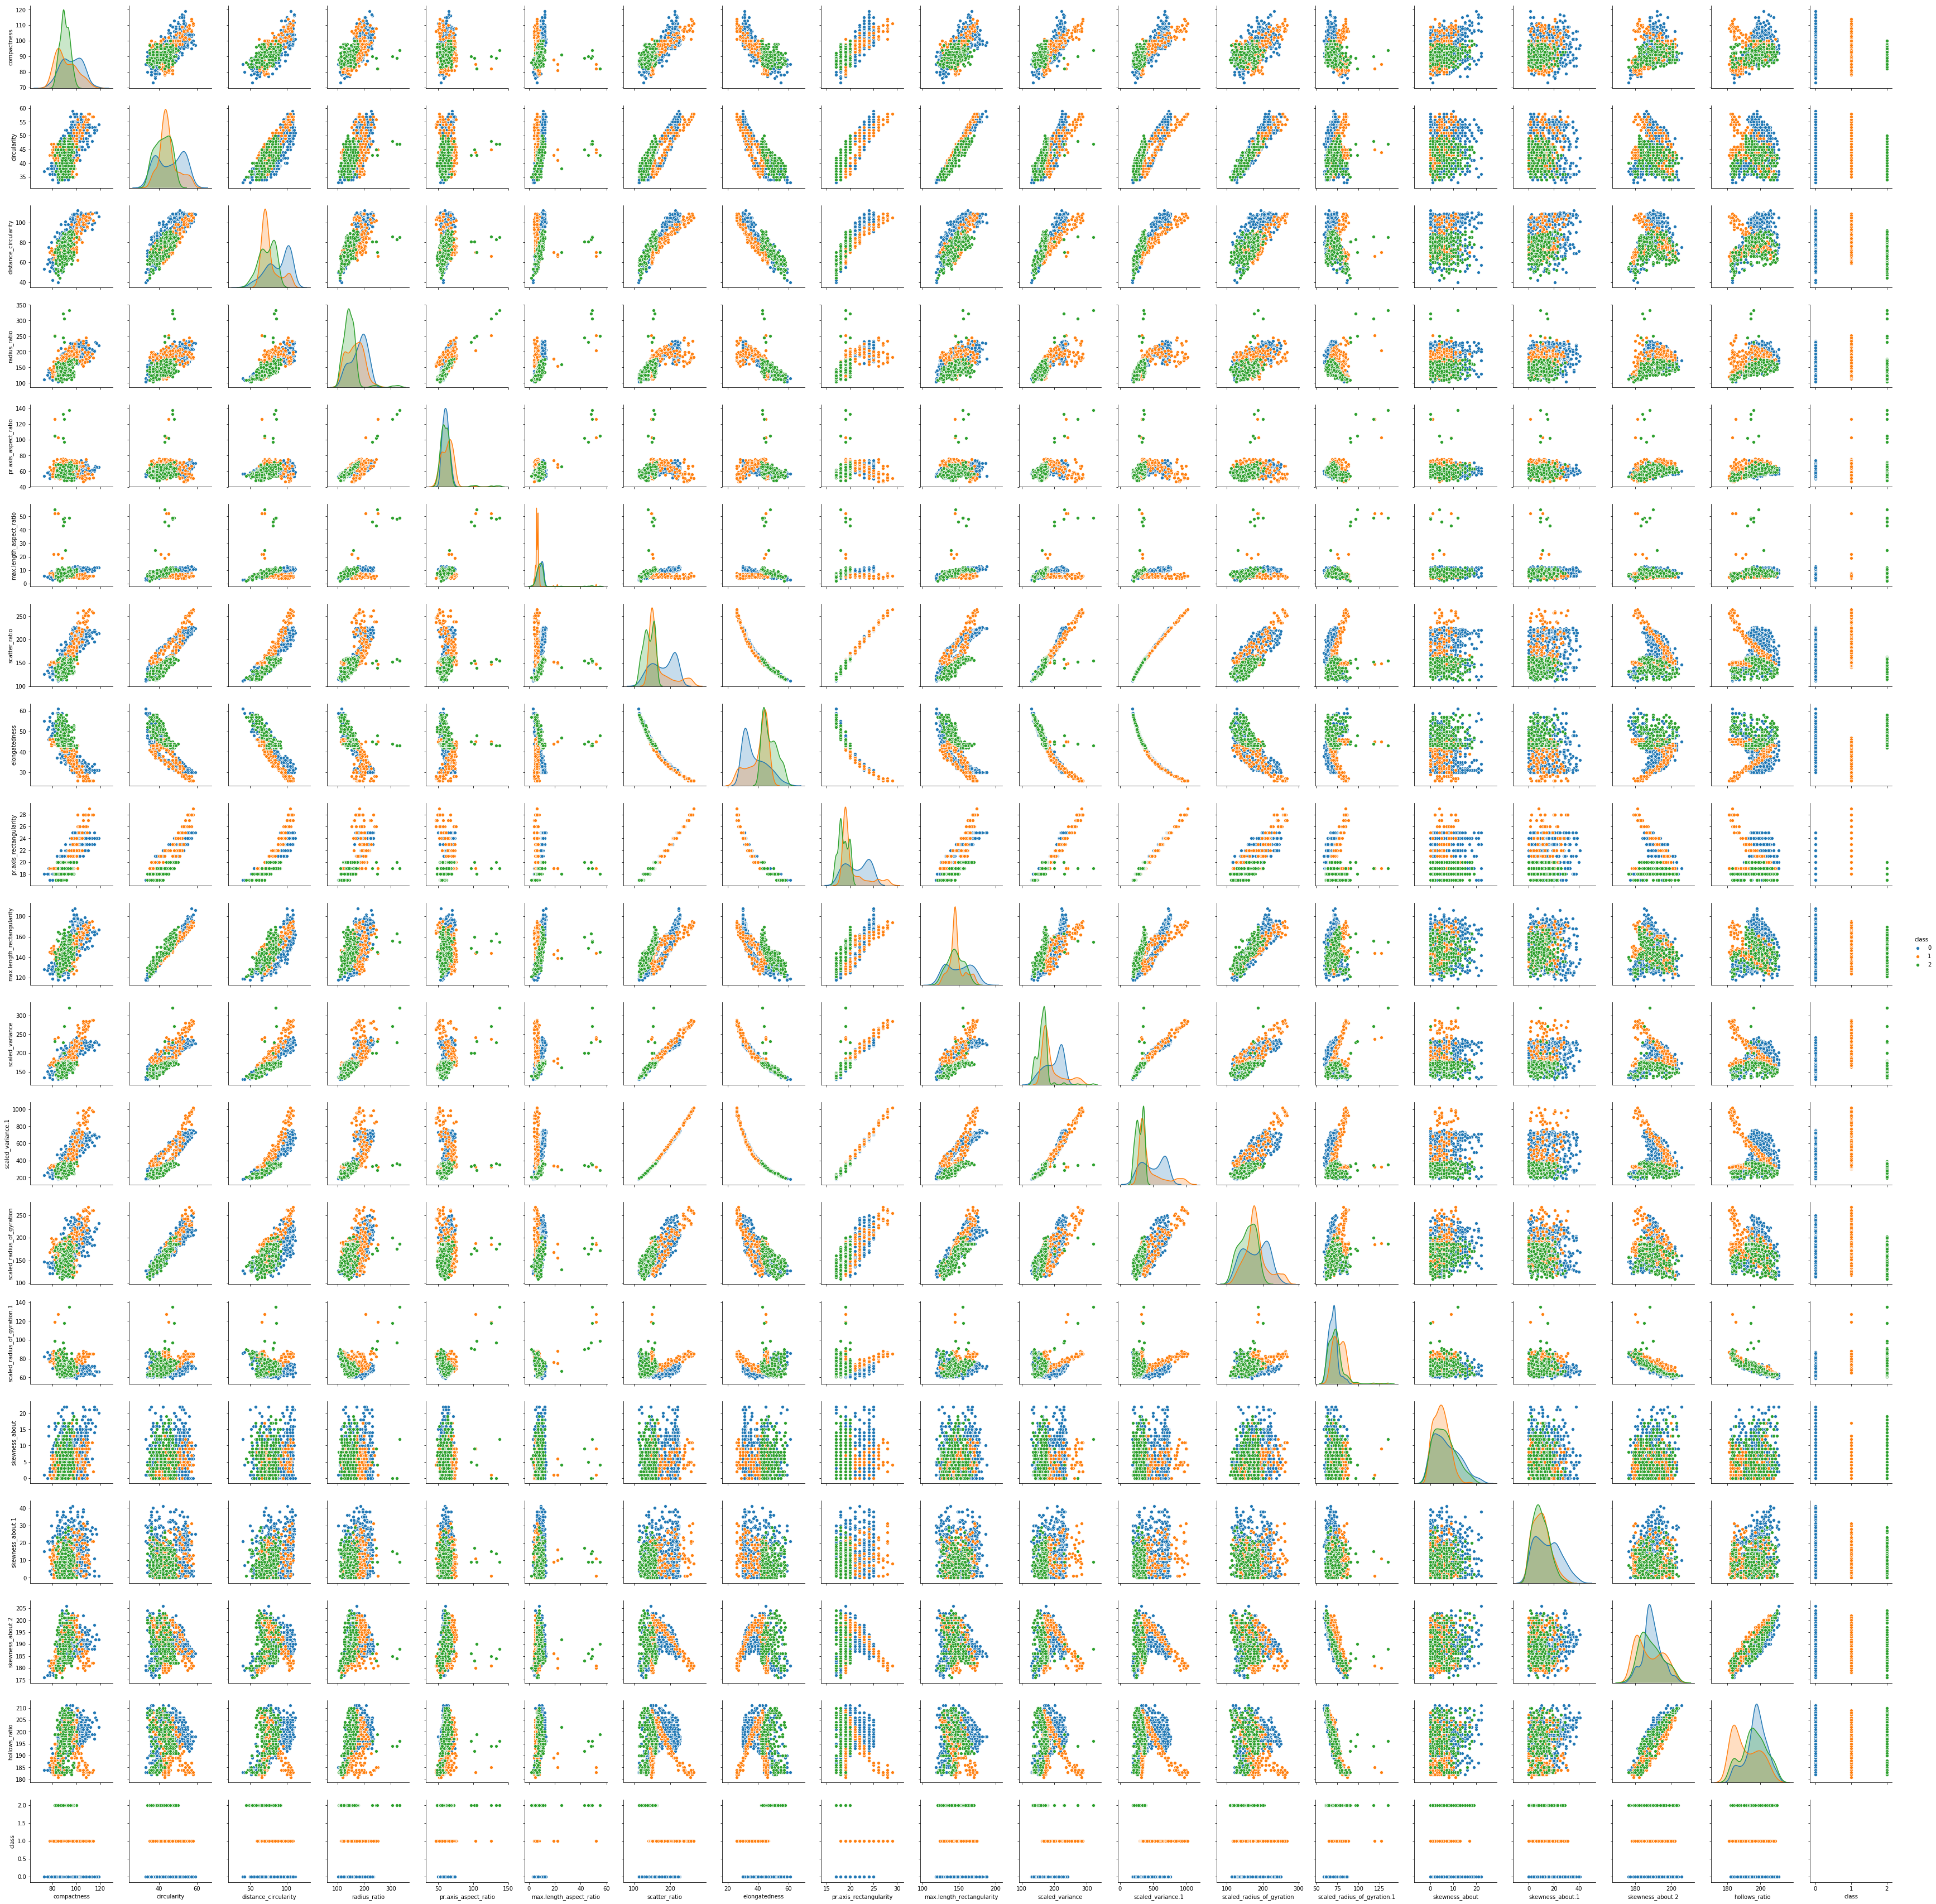

In [21]:
sns.pairplot(df, diag_kind="kde", hue="class")

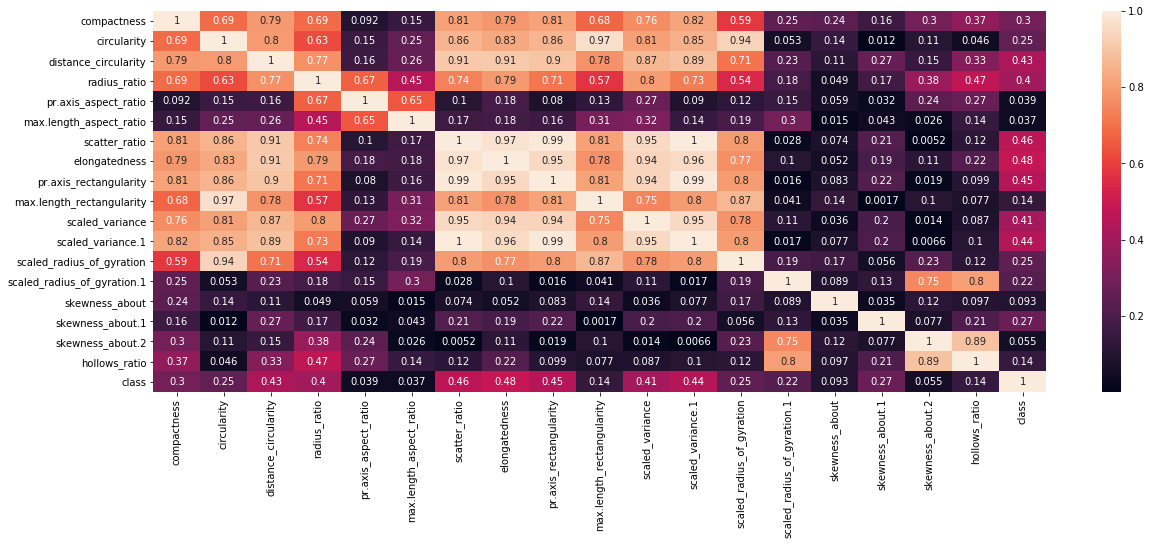

In [22]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr().abs(), annot=True)

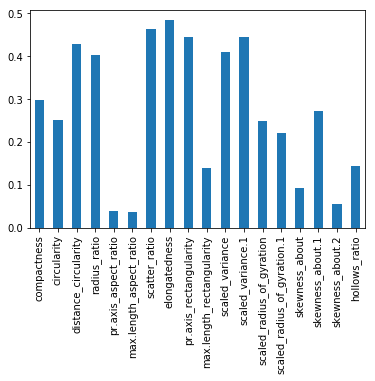

In [23]:
df.corr().abs()['class'][0:18].plot.bar()

### Print all the independent variables with absolute correlation value greater than or equal to `0.9`. These are the independent variables which has multi-colinearity.

In [24]:
corr_matrix = df.corr().abs()

corr_matrix = pd.DataFrame(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack(), columns=['Correlation Value (abs)'])

corr_matrix[corr_matrix['Correlation Value (abs)']>=0.9].sort_values('Correlation Value (abs)', ascending=False).round(2)

Correlation Value (abs)
scatter_ratio          scaled_variance.1                             1.00
pr.axis_rectangularity scaled_variance.1                             0.99
scatter_ratio          pr.axis_rectangularity                        0.99
                       elongatedness                                 0.97
circularity            max.length_rectangularity                     0.97
elongatedness          scaled_variance.1                             0.96
scatter_ratio          scaled_variance                               0.95
elongatedness          pr.axis_rectangularity                        0.95
scaled_variance        scaled_variance.1                             0.95
elongatedness          scaled_variance                               0.94
pr.axis_rectangularity scaled_variance                               0.94
circularity            scaled_radius_of_gyration                     0.94
distance_circularity   elongatedness                                 0.91
                       scatter_ratio                                 0.91

### The above list of independent variable pairs have high correlation between them. We need to find the highest correlation of these 2 columns with `Target` variable and keep that column and drop the other column from our analysis

### After analyzing, the following columns are identified to be dropped from the analysis. Keeping only the `elongatedness` column which has highest correlation value with the Target variable

1. `max.length_rectangularity`
2. `scaled_radius_of_gyration`
3. `distance_circularity`
4. `scatter_ratio`
5. `pr.axis_rectangularity`
6. `scaled_variance`
7. `scaled_variance.1`

### Out of 18 independent variables we will be dropping 7 multi-colinear variables, so we end up having 11 independent variables for our analysis

In [25]:
del_col = ['max.length_rectangularity','scaled_radius_of_gyration','distance_circularity','scatter_ratio',
    'pr.axis_rectangularity','scaled_variance','scaled_variance.1']

In [26]:
X_train = X_train.drop(labels=del_col, axis=1)
X_test = X_test.drop(labels=del_col, axis=1)

In [27]:
X_train.shape, X_test.shape

((572, 11), (232, 11))

# 3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance)

In [28]:
# It's important to scale our data before PCA. So, let us apply standard scaler on both train and test data
from sklearn.preprocessing import StandardScaler

X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [29]:
# import PCA from scikit learn
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=11) # The initial dimension is 11 independent variables 

In [31]:
pca.fit(X_train_sd)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
print(pca.components_.shape)    # as many principal components as original dimensions

(11, 11)


In [33]:
print(np.cumsum(pca.explained_variance_ratio_)) # cumulative variances by principal components

[0.40763501 0.63280401 0.73225803 0.82846242 0.9029838  0.95538604
 0.97341165 0.98576606 0.99453336 0.99769254 1.        ]


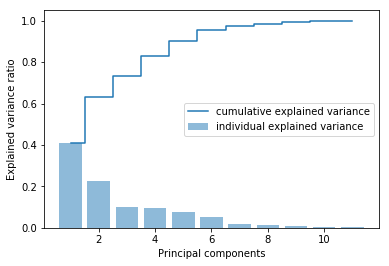

In [34]:
plt.bar(list(range(1,12)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(list(range(1,12)), np.cumsum(pca.explained_variance_ratio_), where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

### First 6 principal components covers 95% of the variances cumulatively. So let us reduce the data from 11 to 6 dimension space

In [35]:
pca = PCA(n_components=6) # Reducing from 11 to 6 dimension space

In [36]:
pca.fit(X_train_sd)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
# project original data into PCA dimensions

X_train_pca = pca.transform(X_train_sd)
X_test_pca = pca.transform(X_test_sd)

print(X_train_pca.shape)
print(X_test_pca.shape)

(572, 6)
(232, 6)


In [38]:
#Let us check the scatter plot of PCA components visually
sns.pairplot(pd.DataFrame(X_train_pca), diag_kind="kde")

### Now you could see the dimension has been reduced to 6 and moreover no correlation is visible from above scatter matrix. We can use this dataset for our further model building

# 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy.

In [39]:
#import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
param_grid = {
    'C': [0.01, 0.05, 0.5, 1],
    'kernel': ['linear', 'rbf']
    }

## a. Train and Find the Accuracy of dimension reduced data (PCA data)

In [42]:
grid_pca = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [43]:
grid_pca.fit(X_train_pca, y_train) # let us pass the dimension reduced training data to train the model

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.7277486910994765, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ... C=0.01, kernel=linear, score=0.680628272251309, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.6526315789473685, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5026178010471204, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5026178010471204, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.01, kernel=rbf, score=0.5052631578947369, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.7696335078534031, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ... C=0.05, kernel=linear, score=0.806282722513089, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.7473684210526316, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5026178010471204, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5026178010471204, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5052631578947369, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [44]:
# print the best hyperparameters

print(grid_pca.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [45]:
# print the best estimator

svm_pca = grid_pca.best_estimator_

print(svm_pca)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [46]:
print('Accuracy on training data', grid_pca.score(X_train_pca, y_train))
print('Accuracy on testing data', grid_pca.score(X_test_pca, y_test))

Accuracy on training data 0.9318181818181818
Accuracy on testing data 0.9008620689655172


In [47]:
print(classification_report(y_test, grid_pca.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       125
           1       0.88      0.96      0.92        51
           2       0.88      0.80      0.84        56

   micro avg       0.90      0.90      0.90       232
   macro avg       0.89      0.89      0.89       232
weighted avg       0.90      0.90      0.90       232



## b. Train and Find the Accuracy of actual data with all 11 independent variables

In [48]:
grid_sd = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [49]:
grid_sd.fit(X_train_sd, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8272251308900523, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8324607329842932, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8105263157894737, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5026178010471204, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5026178010471204, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5052631578947369, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.8743455497382199, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.9162303664921466, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.8842105263157894, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5130890052356021, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5026178010471204, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5052631578947369, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [50]:
# print the best hyperparameters

print(grid_sd.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [51]:
# print the best estimator

svm_sd = grid_sd.best_estimator_

print(svm_sd)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [52]:
print('Accuracy on training data', grid_sd.score(X_train_sd, y_train))
print('Accuracy on testing data', grid_sd.score(X_test_sd, y_test))

Accuracy on training data 0.9702797202797203
Accuracy on testing data 0.9482758620689655


## Crossvalidation:

### a. Crossvalidated score for PCA projected data

In [53]:
scores_pca = cross_val_score(svm_pca, X_test_pca, y_test, cv=20)

print("Average score:" , np.average(scores_pca))

pd.DataFrame(scores_pca)

Average score: 0.8904254079254079


0
0   0.846154
1   1.000000
2   0.923077
3   0.846154
4   0.846154
5   0.833333
6   1.000000
7   0.916667
8   1.000000
9   0.916667
10  0.916667
11  1.000000
12  0.727273
13  0.909091
14  0.909091
15  0.818182
16  0.700000
17  0.900000
18  1.000000
19  0.800000

### b. Crossvalidated score for overall data with 11 independent variables

In [54]:
scores_sd = cross_val_score(svm_sd, X_test_sd, y_test, cv=20)

print("Average score:" , np.average(scores_sd))

pd.DataFrame(scores_sd)

Average score: 0.9444230769230767


0
0   0.846154
1   1.000000
2   0.923077
3   0.923077
4   0.846154
5   0.916667
6   1.000000
7   0.916667
8   0.916667
9   1.000000
10  1.000000
11  1.000000
12  1.000000
13  1.000000
14  1.000000
15  1.000000
16  0.800000
17  0.900000
18  1.000000
19  0.900000